In [78]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [79]:
data = pd.read_csv("./framingham.csv")
data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [80]:

data.dropna(axis = 0, inplace = True)
data.head()
data.isnull().sum()
X = np.asarray(data[['cigsPerDay','totChol','sysBP','glucose']])
Y = np.asarray(data['TenYearCHD'])
print(f"x shape {X.shape} y shape {Y.shape}")
from sklearn.preprocessing import StandardScaler
stsc  = StandardScaler()
x = stsc.fit_transform(X)
print(f"x shape {X.shape} y shape {Y.shape}")

x shape (3658, 4) y shape (3658,)
x shape (3658, 4) y shape (3658,)


In [81]:
xTrain,xTest,yTrain,yTest = train_test_split(x,Y,test_size=.1,random_state=12)

In [82]:
print(f"xtrain {xTrain.shape} x test {xTest.shape} ytrain {yTrain.shape} ytest {yTest.shape}")

xtrain (3292, 4) x test (366, 4) ytrain (3292,) ytest (366,)


In [83]:
reg = LogisticRegression()
reg.fit(xTrain,yTrain)


LogisticRegression()

In [84]:
ypre = reg.predict(xTest)

In [85]:
for i,j in zip(yTest,ypre):
    print(f"{i}  {j}")

0  0
0  0
1  0
0  0
0  0
0  0
0  0
1  0
1  0
0  1
0  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
1  1
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
1  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
1  0
1  0
1  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
1  0
0  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
0  0
1  0
1  0
0  0
1  0
0  0
0  0
0  0
0  0
0  0
0  0


In [86]:
from sklearn.metrics import confusion_matrix,classification_report,r2_score
print(classification_report(yTest,ypre))
cm = confusion_matrix(yTest,ypre)
cm

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       306
           1       0.50      0.07      0.12        60

    accuracy                           0.84       366
   macro avg       0.67      0.53      0.51       366
weighted avg       0.79      0.84      0.78       366



array([[302,   4],
       [ 56,   4]])

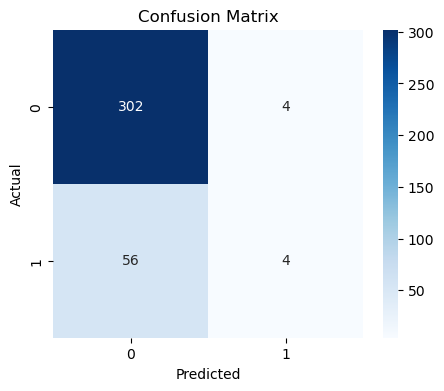

In [88]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [89]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(yTest, ypre)
print("Accuracy:", accuracy)

Accuracy: 0.8360655737704918
